# Added 50% of duplicates

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['sex'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['sex'] >= 0]

sanity_checks_methods.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
sanity_checks_methods.print_duplicates_values(df) 

print(f'\nADDING 50% TO FEATURE \n')

df_dirty = sanity_checks_methods.duplicates_values(df, 50)
sanity_checks_methods.print_duplicates_values(df_dirty)

--------------------------------------
Number of rows:  9999
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 50% TO FEATURE 

Number of rows:  14998
Duplicate Counts:  4999
Percentage of Duplicate Values:  33.33111081477531


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5275
           1       0.98      1.00      0.99      5223

    accuracy                           0.99     10498
   macro avg       0.99      0.99      0.99     10498
weighted avg       0.99      0.99      0.99     10498

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2273
           1       0.96      0.99      0.98      2227

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4999
           1       0.98      1.00      0.99      5000

    accuracy                           0.99      9999


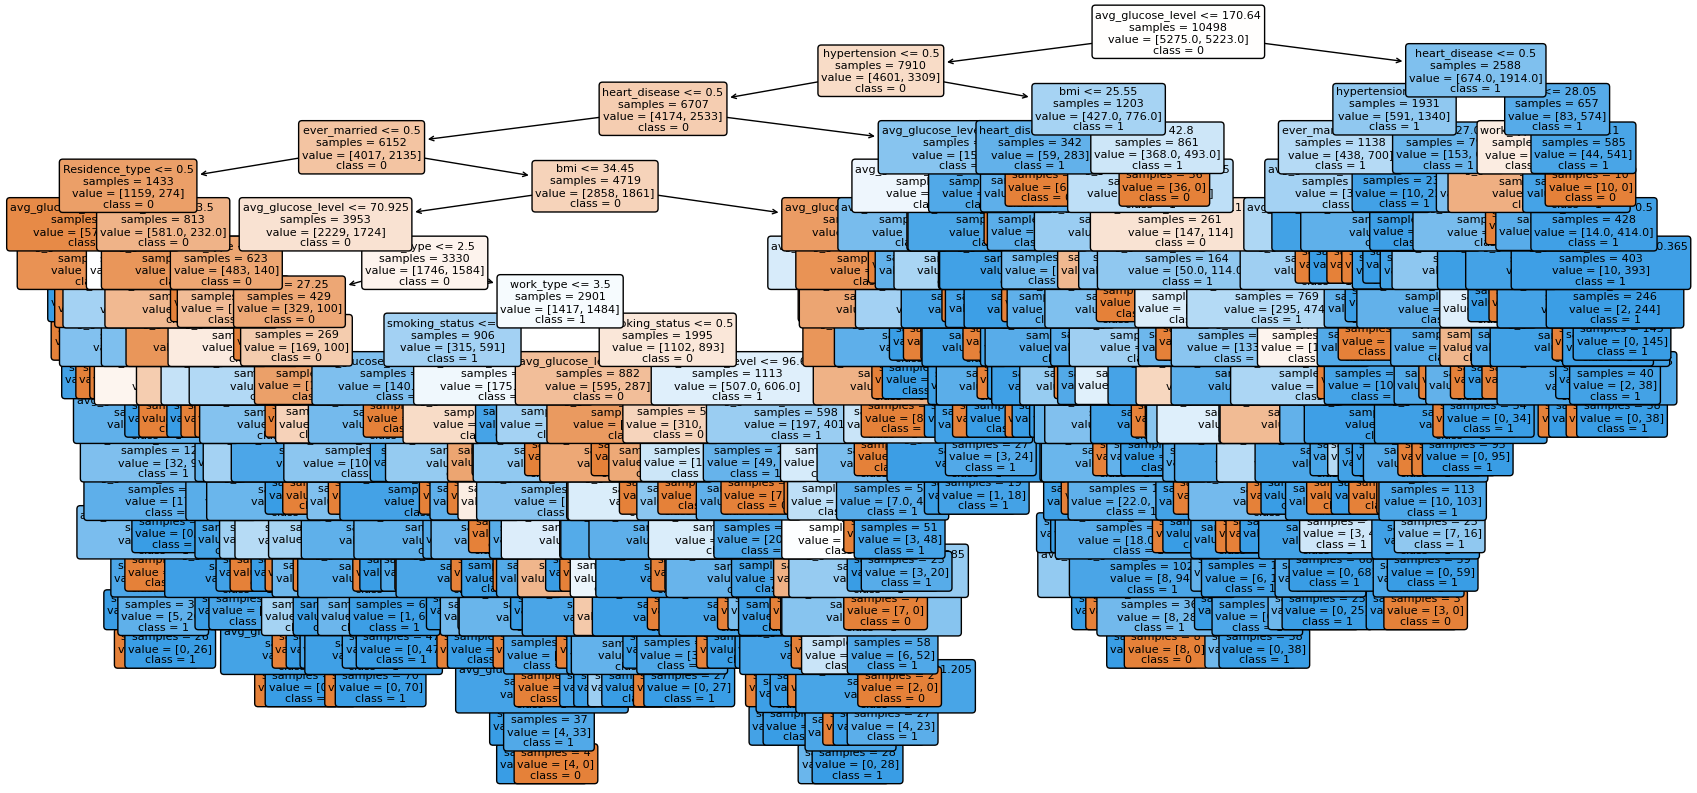

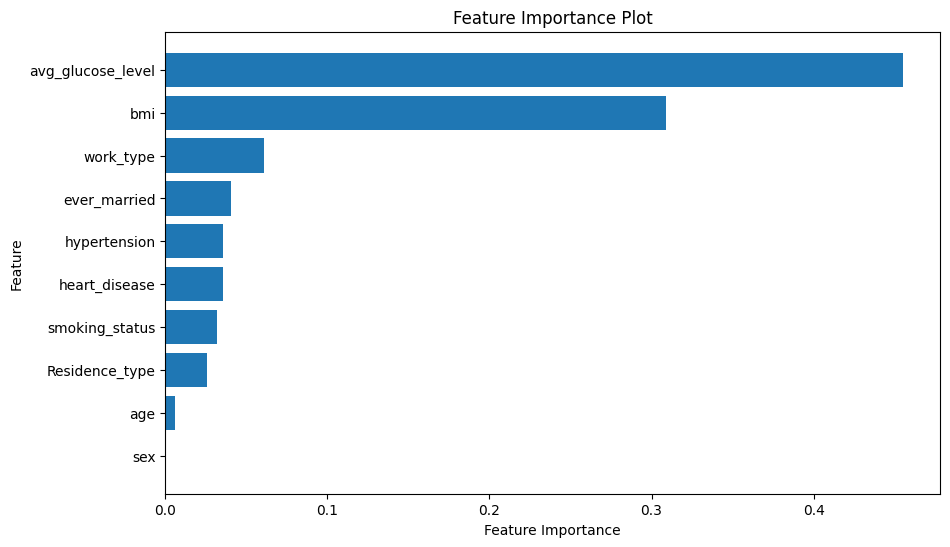

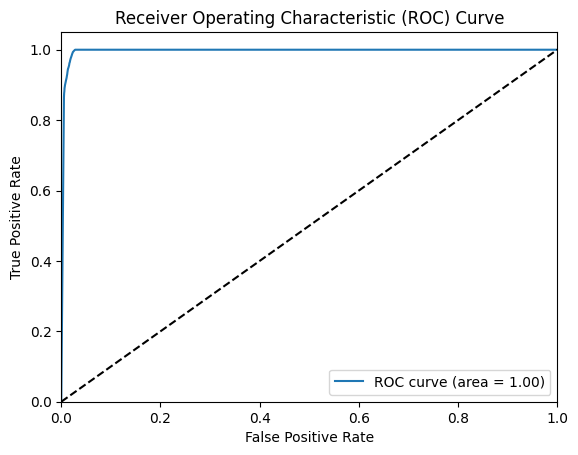

AUC Score: 0.9959169633926785


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9752380952380952, 0.9838095238095238, 0.9809523809523809, 0.9666666666666667, 0.9695238095238096, 0.98, 0.9752380952380952, 0.9742857142857143, 0.9733079122974261, 0.9685414680648237]
Mean accuracy: 0.9747563666076535
95% confidence interval: (0.970751521603687, 0.97876121161162)


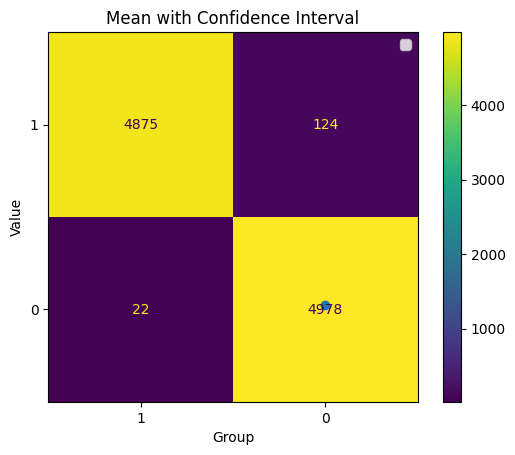

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_dirty)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 44.92129921913147
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.2, 'max_depth': 6, 'max_iter': 205, 'min_samples_leaf': 3}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5275
           1       1.00      1.00      1.00      5223

    accuracy                           1.00     10498
   macro avg       1.00      1.00      1.00     10498
weighted avg       1.00      1.00      1.00     10498

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00      2227

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



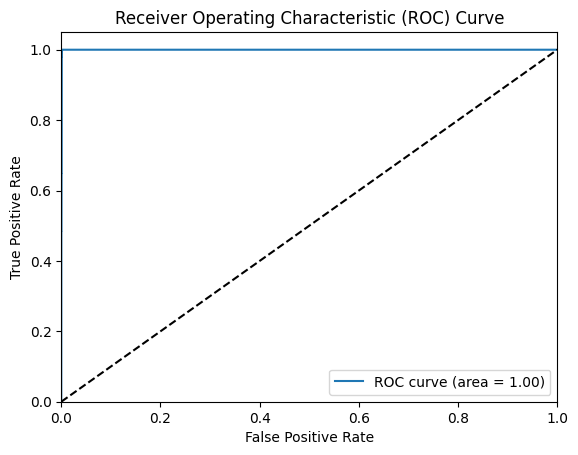

AUC Score: 0.9996226445289058


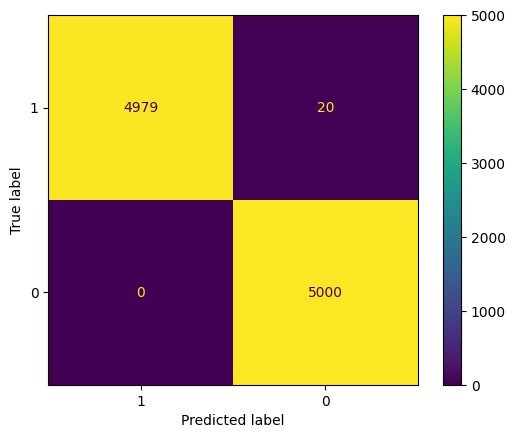

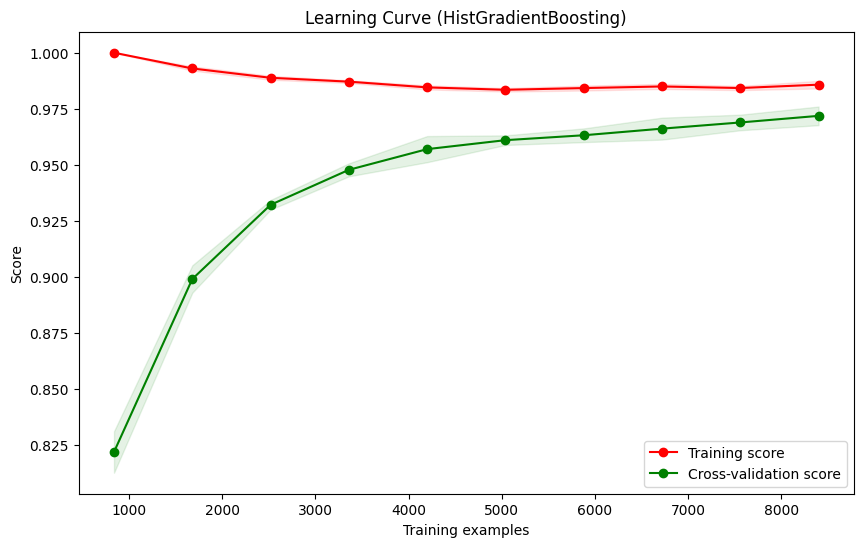

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9923809523809524, 0.9914285714285714, 0.9961904761904762, 0.9885714285714285, 0.9923809523809524, 0.9904761904761905, 0.9961904761904762, 0.9933333333333333, 0.9952335557673975, 0.996186844613918]
Mean accuracy: 0.9932372781333696
95% confidence interval: (0.9913256576832669, 0.9951488985834723)


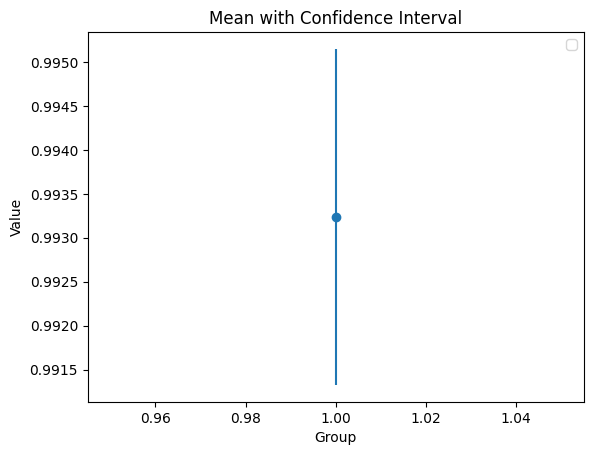

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_dirty, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb, df_dirty)

print('--------------------------------------')